In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt

In [34]:
import random
data = []
for x in range(200):
    data.append({'x': x + random.randint(0, 100), 'y': x + random.randint(0, 100)})
df = pd.DataFrame(data)

In [35]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df[['x']])
df.x = scaler.transform(df[['x']])
scaler.fit(df[['y']])
df.y = scaler.transform(df[['y']])

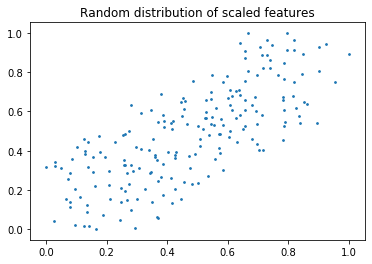

In [54]:
plt.title('Random distribution of scaled features')
plt.scatter(df.x, df.y, s=3)

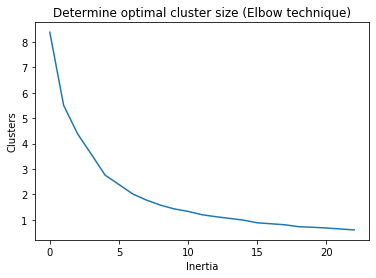

In [49]:
test = []
for t in range(2, 25):
    km = cluster.KMeans(n_clusters=t)
    km.fit(df[['x', 'y']])
    test.append(km.inertia_)
plt.title('Determine optimal cluster size (Elbow technique)')
plt.xlabel('Inertia')
plt.ylabel('Clusters')
plt.plot(test)

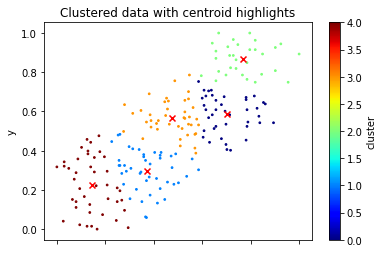

In [53]:
km = cluster.KMeans(n_clusters=5)
km.fit(df[['x', 'y']])
df['cluster'] = km.labels_
centroids = km.cluster_centers_
q = df.plot.scatter(x='x', y='y', c='cluster', colormap='jet', s=3)
q.set_title('Clustered data with centroid highlights')
q.scatter(centroids[:,0], centroids[:,1], marker='x', color='red')